In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pseudopy import *
from matplotlib import pyplot
from scipy import linalg
from scipy.linalg import eigvals
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

In [2]:
A = np.matrix([[2,  0, 1],
               [3, -1, 1],
               [-2,  4, 1],
               [1,  1, 1]]);A

matrix([[ 2,  0,  1],
        [ 3, -1,  1],
        [-2,  4,  1],
        [ 1,  1,  1]])

In [3]:
d = A.T@A

In [4]:
Λ,X = np.linalg.eig(d)

In [5]:
D = np.diag(np.round(Λ));D

array([[28.,  0.,  0.],
       [ 0., 12.,  0.],
       [ 0.,  0., -0.]])

In [6]:
np.round(X,3)

array([[-0.707,  0.577, -0.408],
       [ 0.707,  0.577, -0.408],
       [ 0.   ,  0.577,  0.816]])

In [7]:
U,S,V = np.linalg.svd(A,full_matrices=False)
S = np.diag(S)
S

array([[5.29150262e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.46410162e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.72212401e-16]])

In [8]:
U

matrix([[-2.67261242e-01,  5.00000000e-01, -8.04910061e-01],
        [-5.34522484e-01,  5.00000000e-01,  5.69500183e-01],
        [ 8.01783726e-01,  5.00000000e-01,  1.11363435e-01],
        [ 2.49800181e-16,  5.00000000e-01,  1.24046443e-01]])

In [9]:
V

matrix([[-7.07106781e-01,  7.07106781e-01,  2.10475052e-16],
        [ 5.77350269e-01,  5.77350269e-01,  5.77350269e-01],
        [ 4.08248290e-01,  4.08248290e-01, -8.16496581e-01]])

In [10]:
np.round(U@S@V.T,2)

array([[ 2.22,  0.18,  0.13],
       [ 3.22, -0.63, -0.45],
       [-1.78,  3.45,  2.44],
       [ 1.22,  1.  ,  0.71]])

In [11]:
x = np.array([9,10,2,7,1,3,4,6,8,5]);x
x = np.asmatrix(x)
U,S,V = np.linalg.svd(x)

In [12]:
B = np.matrix([[ 6, 6],
               [-1, 1]]);B

matrix([[ 6,  6],
        [-1,  1]])

In [13]:
U,S,V = np.linalg.svd(B,full_matrices=False)
S = np.diag(S)
np.round(U@S@V.T,2)

array([[ 6.,  6.],
       [-1.,  1.]])

In [14]:
np.linalg.eig(B)

(array([4., 3.]),
 matrix([[ 0.9486833 , -0.89442719],
         [-0.31622777,  0.4472136 ]]))

In [15]:
def Gerschgorin(A):

    n = len(A)
    eval, evec = np.linalg.eig(A)

    patches = []
    
    # draw discs
    
    for i in range(n):
        xi = np.real(A[i,i])
        yi = np.imag(A[i,i])
        ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i]) 
        
        circle = Circle((xi, yi), ri)
        patches.append(circle)

    fig, ax = plt.subplots()

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.1)
    ax.add_collection(p)
    plt.axis('equal')
    
    for xi, yi in zip(np.real(eval), np.imag(eval)):
        plt.plot(xi, yi,'o')
    
    plt.show()

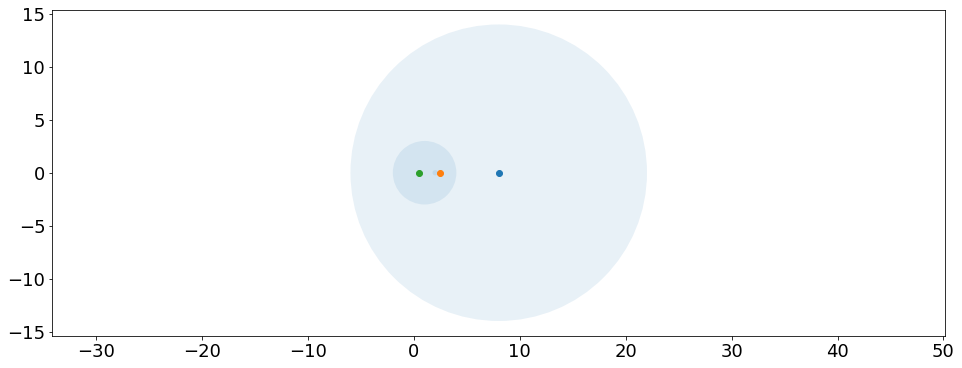

In [16]:
A = np.matrix([[ 8, 7,7],
               [0,2,1/4],
              [0,3,1]]);A
Gerschgorin(A)

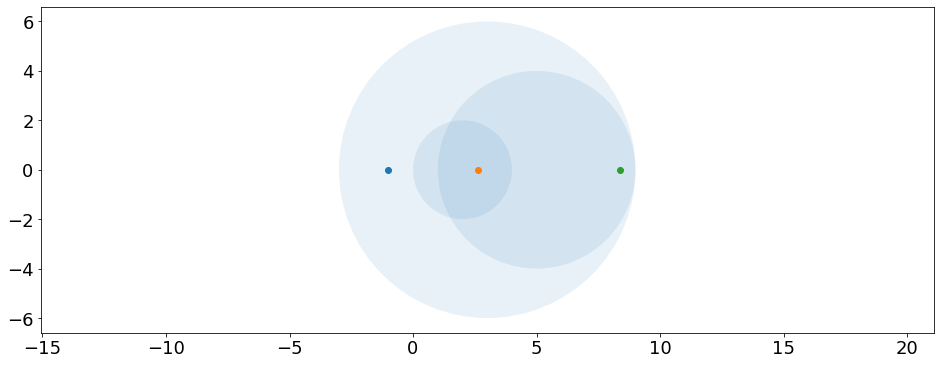

In [17]:
B = np.matrix([[2,2,0],
               [2,3,4],
              [0,4,5]]);B
Gerschgorin(B)

In [18]:
np.random.seed(123)
n  = 6
mu = 0  
sigma = 1
A  = np.random.normal(mu, sigma, (n,n))
A  = np.asmatrix(A)
C = (A+A.conj().T)/2

In [19]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(C)

True

In [20]:
def randomhermitian(n):
    np.random.seed(123)
    mu = 0  
    sigma = n**(-1/2)
    A  = np.random.normal(mu, sigma, (n,n))* 1j
    A  = np.asmatrix(A);A
    C = (A+A.conj().T)/2
    return(C)

In [21]:
A = randomhermitian(4);A

matrix([[ 0.+0.j        ,  0.+0.39398642j,  0.-0.24573944j,
          0.-0.74942109j],
        [ 0.-0.39398642j,  0.+0.j        , -0.-0.38998471j,
          0.+0.05249734j],
        [ 0.+0.24573944j,  0.+0.38998471j,  0.+0.j        ,
          0.+0.08731825j],
        [ 0.+0.74942109j, -0.-0.05249734j, -0.-0.08731825j,
          0.+0.j        ]])

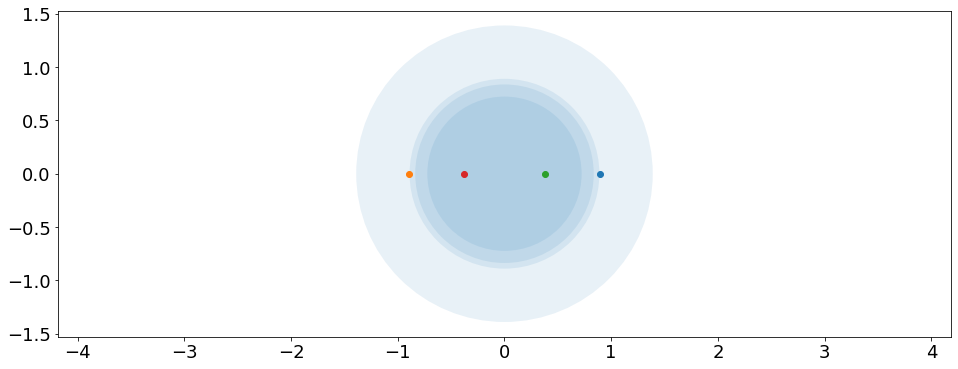

In [22]:
Gerschgorin(A)

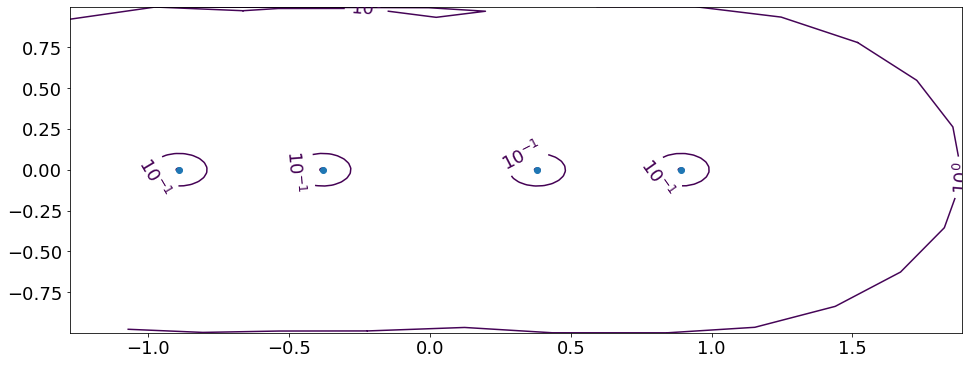

In [23]:
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()

In [24]:
U,S,V = np.linalg.svd(B,full_matrices=False)

In [25]:
df = pd.read_csv("/Users/nikosmatsavelas/Desktop/Thesis NTUA/econ - Sheet1.csv")
df

,Country,Increase,Life,imr,tfr,gdp
0,Albania,1.2,69.2,30,2.9,659.91
1,Argentina,1.2,68.6,24,2.8,4343.04
2,Australia,1.1,74.7,7,1.9,17529.98
3,Austria,1.0,73.0,7,1.5,20561.88
4,Benin,3.2,45.9,86,7.1,398.21
5,Bolivia,2.4,57.7,75,4.8,812.19
6,Brazil,1.5,64.0,58,2.9,3219.22
7,Cambodia,2.8,50.1,116,5.3,97.39
8,China,1.1,66.7,44,2.0,341.31
9,Colombia,1.7,66.4,37,2.7,1246.87


In [26]:
df.cov()

,Increase,Life,imr,tfr,gdp
Increase,1.758900,-8.653950,37.113333,2.143083,-5.115258e+03
Life,-8.653950,79.685267,-305.898333,-14.964667,4.965945e+04
imr,37.113333,-305.898333,1381.333333,61.537500,-2.037920e+05
tfr,2.143083,-14.964667,61.537500,3.571667,-9.200412e+03
gdp,-5115.257723,49659.453270,-203791.976750,-9200.412267,6.553446e+07


In [27]:
d = df.corr();d

,Increase,Life,imr,tfr,gdp
Increase,1.000000,-0.730979,0.752940,0.855033,-0.476444
Life,-0.730979,1.000000,-0.922017,-0.887039,0.687192
imr,0.752940,-0.922017,1.000000,0.876103,-0.677334
tfr,0.855033,-0.887039,0.876103,1.000000,-0.601363
gdp,-0.476444,0.687192,-0.677334,-0.601363,1.000000


In [28]:
Λ,X = np.linalg.eig(d)
np.sqrt(np.diag(Λ))


array([[2.00348196, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.75419734, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.50256601, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.30963564, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.26229679]])

In [29]:
X

array([[-0.42768621,  0.51149975,  0.64548884, -0.28397399,  0.2411544 ],
       [ 0.47437702,  0.04578062,  0.47607336, -0.16217624, -0.72105728],
       [-0.47450184, -0.01195852, -0.41723864, -0.63391726, -0.4458316 ],
       [-0.47409829,  0.24919979, -0.02745948,  0.69995012, -0.47164189],
       [ 0.377001  ,  0.82099245, -0.42644603, -0.03572625,  0.02662827]])

In [30]:

(Λ[0]+Λ[1])/np.sum(Λ)

0.916550714071298

In [31]:
df1 = pd.DataFrame({ 'PC1': [round(np.sqrt(Λ[0]),4), (Λ[0])/np.sum(Λ),(Λ[0])/np.sum(Λ) ],
                     'PC2': [round(np.sqrt(Λ[1]),4), (Λ[1])/np.sum(Λ),(Λ[0]+Λ[1])/np.sum(Λ)],
                     'PC3': [round(np.sqrt(Λ[2]),4), (Λ[2])/np.sum(Λ),(Λ[0]+Λ[1]+Λ[2])/np.sum(Λ)],
                     'PC4': [round(np.sqrt(Λ[3]),4), (Λ[3])/np.sum(Λ),(Λ[0]+Λ[1]+Λ[2]+Λ[3])/np.sum(Λ)],
                     'PC5': [round(np.sqrt(Λ[4]),4), (Λ[4])/np.sum(Λ),(Λ[0]+Λ[1]+Λ[2]+Λ[3]+Λ[4])/np.sum(Λ) ]},
                    index=[ "Standard deviation", "Proportion of Variance","Cumulative Proportion"])
df1

,PC1,PC2,PC3,PC4,PC5
Standard deviation,2.003500,0.754200,0.502600,0.309600,0.26230
Proportion of Variance,0.802788,0.113763,0.050515,0.019175,0.01376
Cumulative Proportion,0.802788,0.916551,0.967065,0.986240,1.00000


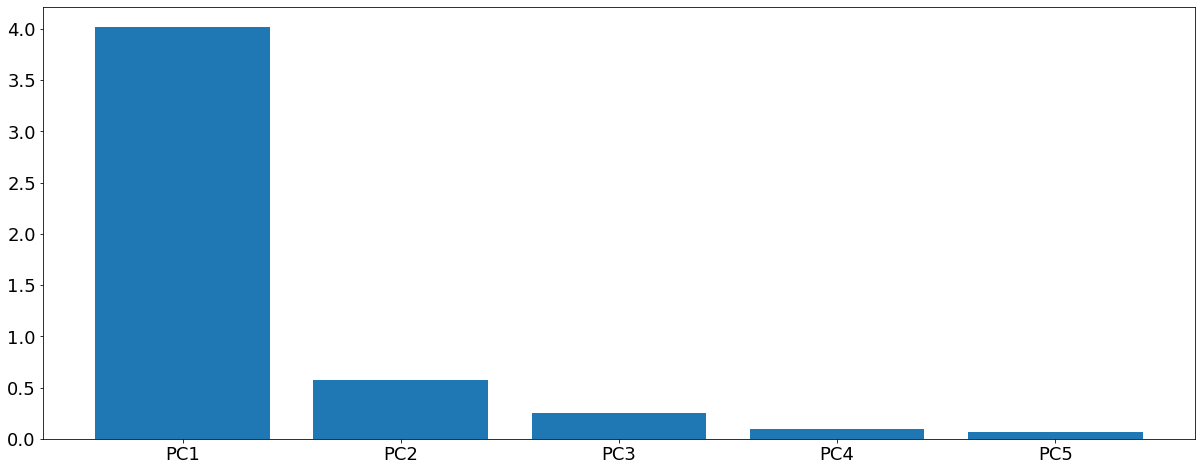

In [32]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pcs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
eigen = [Λ[0],Λ[1],Λ[2],Λ[3],Λ[4]]
ax.bar(pcs,eigen)
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X)

In [35]:
from scipy.linalg import svdvals
def inv_resolvent_norm(A, z, method='svd'):
    
    if method == 'svd':
        return np.min(svdvals(A - z*np.eye(*A.shape)))
    elif method == 'lanczos':
        m, n = A.shape
        if m > n:
            raise ValueError('m > n is not allowed')
        AH = A.T.conj()

        def matvec(x):
            
            x1 = x[:m]
            x2 = x[m:]
            ret1 = AH.dot(x2) - np.conj(z)*x2
            ret2 = np.array(A.dot(x1), dtype=np.complex)
            ret2[:n] -= z*x1
            return np.c_[ret1, ret2]
        AH_A = LinearOperator(matvec=matvec, dtype=np.complex,
                              shape=(m+n, m+n))

        evals = eigsh(AH_A, k=2, tol=1e-6, which='SM', maxiter=m+n+1,
                      ncv=2*(m+n),
                      return_eigenvectors=False)

        return np.min(np.abs(evals))

In [36]:
A = np.matrix([[-1,1,0],
               [0,-1,1],
               [4,-8,4]])
A

matrix([[-1,  1,  0],
        [ 0, -1,  1],
        [ 4, -8,  4]])

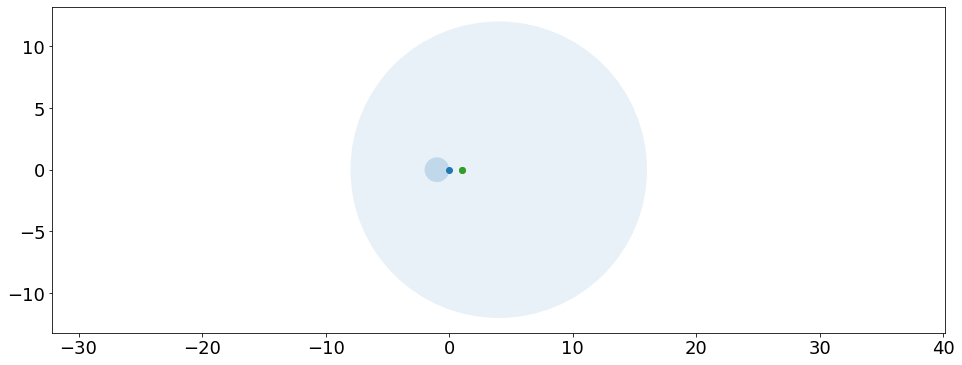

In [37]:
Gerschgorin(A)

In [38]:
inv_resolvent_norm(A, z=1j, method='svd')

0.14073330835911999

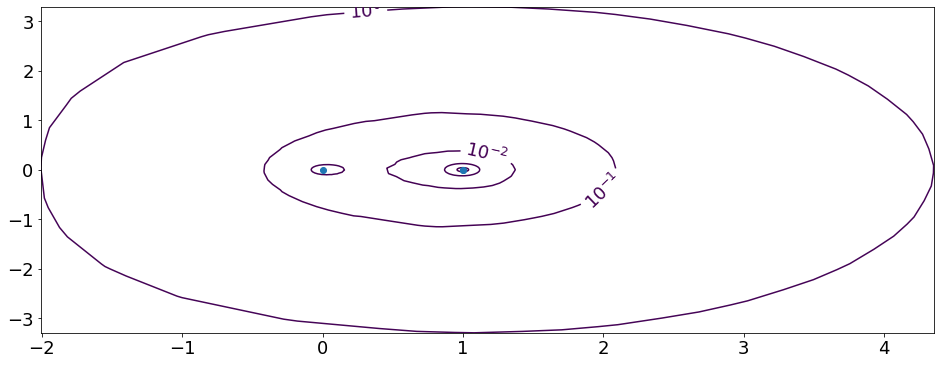

In [39]:
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()

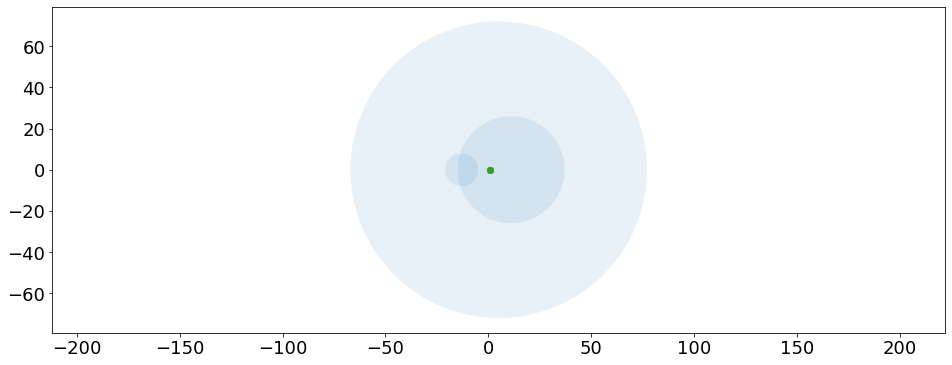

In [40]:
A = np.matrix([[-13,-2,6],
               [52,5,-20],
               [-22,-4,11]])
A
Gerschgorin(A)

In [41]:
inv_resolvent_norm(A, z=1j, method='svd')

0.014880045695576412

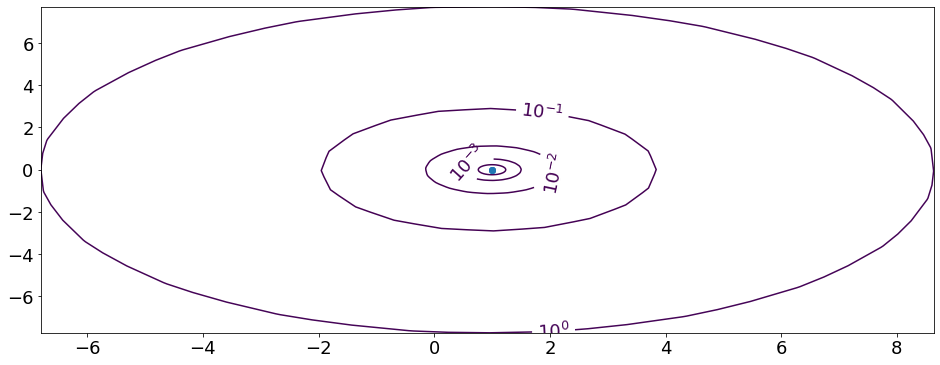

In [42]:
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()

In [43]:
n  = 2000
mu = 0  
sigma = 1
A  = np.random.normal(mu, sigma, (n,n))

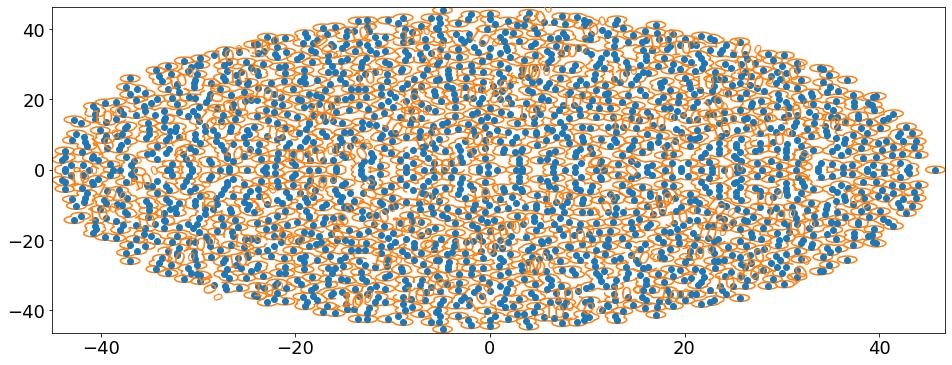

In [44]:
pseudo = Normal(A)
pseudo.plot([10**k for k in range(-1, 1)], spectrum=eigvals(A))
pyplot.show()

In [45]:
def rsvd(A, Omega):
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

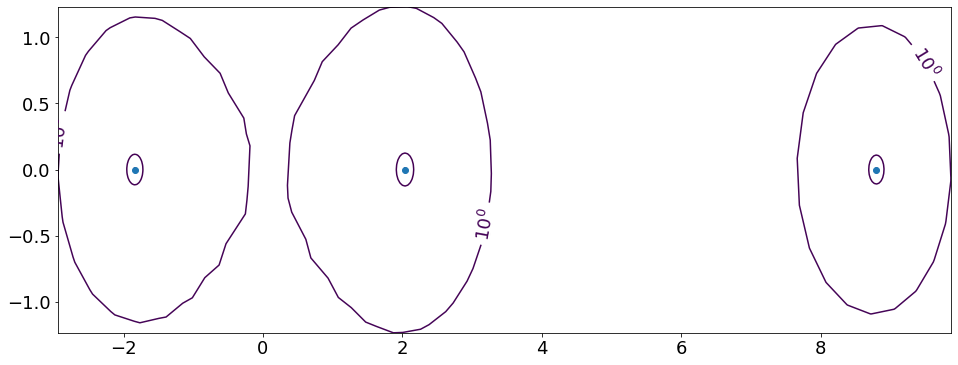

In [46]:
np.random.seed(1000)
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
k = 2
p = 1
l = k+p
Omega = np.random.randn(A.shape[1], l)
Omega
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()


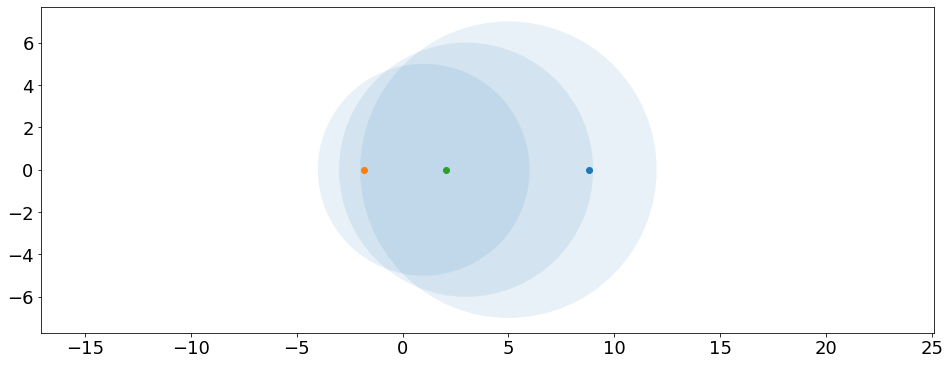

In [47]:
Gerschgorin(A)

In [48]:
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[-0.37421754  0.28475648 -0.88253894]
 [-0.56470638 -0.82485997 -0.02669705]
 [-0.7355732   0.48838486  0.46948087]]

Singular values:
[9.34265841 3.24497827 1.08850813]

Right singular vectors:
[[-0.57847229 -0.61642675 -0.53421706]
 [-0.73171177  0.10269066  0.67383419]
 [ 0.36051032 -0.78068732  0.51045041]]



In [49]:
def power_iteration(A,k,p,q = 3):
    m = A.shape[0]
    n = A.shape[1]
    l = k + p 
    Y = A @ Omega
    for q in range(q):
        Y = A @ (A.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q


In [50]:
def rsvd(A,k,p,q):
    Q = power_iteration(A,k,p,q)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

In [51]:
np.random.seed(1000)
a = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])

np.linalg.cond(a)

8.582993689370598

In [52]:
power_iteration(A,k=10,p=3,q=3)

array([[-0.37340895,  0.2862492 , -0.88239852],
       [-0.56703696, -0.82324628, -0.02710443],
       [-0.73418992,  0.49023153,  0.46972141]])

In [53]:
rsvd(A,k=30,p=10,q=5)

(array([[ 0.37421754, -0.28475648, -0.88253894],
        [ 0.56470638,  0.82485997, -0.02669705],
        [ 0.7355732 , -0.48838486,  0.46948087]]),
 array([9.34265841, 3.24497827, 1.08850813]),
 array([[ 0.57847229,  0.61642675,  0.53421706],
        [ 0.73171177, -0.10269066, -0.67383419],
        [ 0.36051032, -0.78068732,  0.51045041]]))

In [54]:
U,S,V = np.linalg.svd(a,full_matrices=False)
np.max(S)/np.min(S)

8.582993689370602

In [55]:
u, s, v = rsvd(A, k,p,q=1)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.37421754 -0.28475648 -0.88253894]
 [ 0.56470638  0.82485997 -0.02669705]
 [ 0.7355732  -0.48838486  0.46948087]]

Singular values:
[9.34265841 3.24497827 1.08850813]

Right singular vectors:
[[ 0.57847229  0.61642675  0.53421706]
 [ 0.73171177 -0.10269066 -0.67383419]
 [ 0.36051032 -0.78068732  0.51045041]]



In [56]:
power_iteration(A,k=10,p=10,q = 3)

array([[-0.37340895,  0.2862492 , -0.88239852],
       [-0.56703696, -0.82324628, -0.02710443],
       [-0.73418992,  0.49023153,  0.46972141]])

In [57]:
def singlepass(A,k,p):
    np.random.seed(123)
    m = A.shape[0]
    n = A.shape[1]
    l = k+p
    Ω = np.random.normal(0,1,size=(n,k)) # n x k
    Ψ = np.random.normal(0,1,size=(l,m)) # l x m
    Y = A@Ω         # m x n  * n x k =     m x k 
    W = Ψ@A         # l x m  * m x n =     l x n 
    Q, _ = np.linalg.qr(Y,mode='reduced')# m x k 
    X = np.linalg.pinv(Ψ@Q)@W            # k x n  
    Ahat = Q@X     # m x k  * k x n =      m x n 
    error = np.linalg.norm(A-Q@Q.T@A,"fro")
    return(Ahat,error)
 

(596, 738, 3)
(596, 738, 3)


(596, 738)

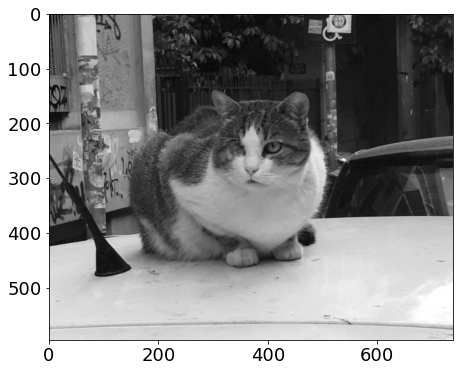

In [58]:
A = imread(os.path.join("/Users/nikosmatsavelas/Desktop/Thesis NTUA/cat.jpg"))
print(A.shape)
A[:, :, 0].shape
img_array = A / 255
print(img_array.shape)
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap="gray")
img_gray.shape

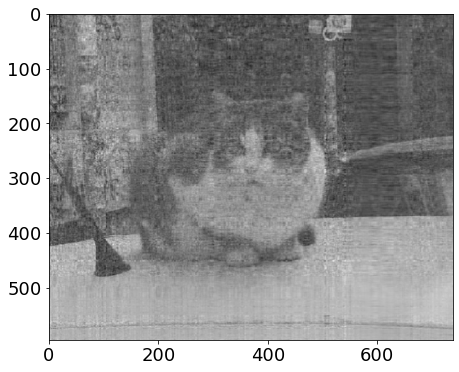

In [59]:
AH = singlepass(A=img_gray,k=100,p=10) 
plt.imshow(AH[0], cmap="gray")
plt.show()

In [60]:
AH1 = singlepass(A=img_gray,k=500,p=10) 
AH2 = singlepass(A=img_gray,k=400,p=10) 
AH3 = singlepass(A=img_gray,k=300,p=10) 
AH4 = singlepass(A=img_gray,k=200,p=10) 
AH5 = singlepass(A=img_gray,k=100,p=10) 

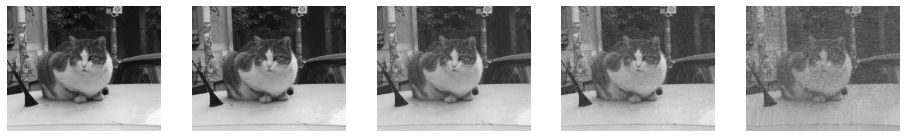

In [61]:
## Plot
fig, axs = plt.subplots(1,5)

plt.set_cmap('gray')
axs[0].imshow(AH1[0])
axs[0].axis('off')
axs[1].imshow(AH2[0])
axs[1].axis('off')
axs[2].imshow(AH3[0])
axs[2].axis('off')
axs[3].imshow(AH4[0])
axs[3].axis('off')
axs[4].imshow(AH5[0])
axs[4].axis('off')
plt.show()

In [62]:
import pandas as pd
df = pd.DataFrame({'error':[AH1[1],
                   AH2[1],
                   AH3[1],
                   AH4[1],
                   AH5[1]]})
df.index = ['Error k =500 , p =10 ', 
            'Error k =400 , p =10', 
            'Error k =300 , p =10',
            'Error k =200 , p =10',
            'Error k =100 , p =10']
np.round(df,5)

,error
"Error k =500 , p =10",0.70422
"Error k =400 , p =10",1.82406
"Error k =300 , p =10",3.79406
"Error k =200 , p =10",7.55797
"Error k =100 , p =10",15.92835


In [63]:
def singlepasshermitian(A,k,p):
    np.random.seed(5)
    n = A.shape[1]
    l = k+p 
    G = np.random.normal(0,1,size=(n,l)) # n x l
    Y = A@G         # n x n  * n x l =     n x l 
    Q, _ = np.linalg.qr(Y,mode='reduced')  # n x l 
    C = Q.T@Y
    L , Uhat = np.linalg.eig(C)
    U = Q@Uhat
    Ahat = U@np.diag(L)@U.T
    error = np.linalg.norm(A - Ahat,ord=2)/np.linalg.norm(A,ord=2)
    return(Ahat,error)

In [64]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [65]:
from sklearn.datasets import make_sparse_spd_matrix
F1 = make_sparse_spd_matrix(1000)
is_pos_def(F1)

True

In [66]:
U,error =singlepasshermitian(A=F1,k=300,p=10) 
error

57.72295710170855

In [67]:
def singlepassGENERAL(A,k,p):
    np.random.seed(4)
    m = A.shape[0]
    n = A.shape[1]
    l = k + p 
    GC = np.random.normal(0,1,size=(n,l))              # n x l
    GR = np.random.normal(0,1,size=(m,l))              # m x l
    YC = A@GC ;YC.shape          # m x n  * n x l =      m x l 
    YR = A.T@GR ;YR.shape        # n x m  * m x l =      n x l 
    QC, _ = np.linalg.qr(YC,mode='reduced');QC.shape   # m x l 
    QR, _ = np.linalg.qr(YR,mode='reduced');QR.shape   # n x l 
    C = QC.T@A@QR ;C.shape                             # l x l  
    Uhat,D,Vhat = np.linalg.svd(C,full_matrices = False)
    U = QC@Uhat                                        # m x l
    V = QR@Vhat                                        # n x l
    X = U@np.diag(D)@V.T  # m x l* l x l  * l x n =      m x n
    error = np.linalg.norm(A-X,ord=2)/np.linalg.norm(A,ord=2)
    return(X,error)
 
 

In [68]:
A = imread(os.path.join("/Users/nikosmatsavelas/Desktop/Thesis NTUA/gray.jpg"))
A.shape

(1204, 1880)

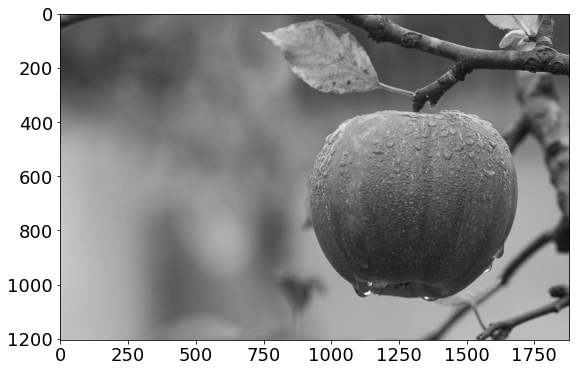

In [69]:
plt.imshow(A, cmap="gray")

In [70]:
SP1 = singlepassGENERAL(A=A,k=500,p=50) 
SP2 = singlepassGENERAL(A=A,k=400,p=50) 
SP3 = singlepassGENERAL(A=A,k=300,p=50) 
SP4 = singlepassGENERAL(A=A,k=200,p=50) 
SP5 = singlepassGENERAL(A=A,k=100,p=50) 

In [71]:
import pandas as pd
df = pd.DataFrame({'error':[SP1[1],
                   SP2[1],
                   SP3[1],
                   SP4[1],
                   SP5[1]]})
df.index = ['Realtive Error k =500 , p =50 ', 
            'Realtive Error k =400 , p =50', 
            'Realtive Error k =300 , p =50',
            'Realtive Error k =200 , p =50',
            'Realtive Error k =100 , p =50']
np.round(df,5)

,error
"Realtive Error k =500 , p =50",1.10565
"Realtive Error k =400 , p =50",1.81833
"Realtive Error k =300 , p =50",0.16447
"Realtive Error k =200 , p =50",0.21075
"Realtive Error k =100 , p =50",0.87654


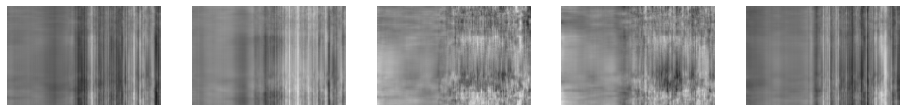

In [72]:
## Plot
fig, axs = plt.subplots(1,5)

plt.set_cmap('gray')
axs[0].imshow(SP1[0])
axs[0].axis('off')
axs[1].imshow(SP2[0])
axs[1].axis('off')
axs[2].imshow(SP3[0])
axs[2].axis('off')
axs[3].imshow(SP4[0])
axs[3].axis('off')
axs[4].imshow(SP5[0])
axs[4].axis('off')
plt.show()

In [73]:
def Accurancy_enhanced(A,k,p,power_iter = 3):
    
    np.random.seed(3)
    m = A.shape[0] # rows
    n = A.shape[1] # columns
    G = np.random.normal(0,1, size=(n,k+p))
    Y = A@G
    for q in range(power_iter):
        Z = A.T@Y
        Y = A@Z
    Q, _ = np.linalg.qr(Y)
    B = Q.T@A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = False)
    U = Q @ u_tilde
    return(Q,U)

In [74]:
def Accurancy_enhanced_ortho(A,k,p,power_iter = 3):
    np.random.seed(2)
    m = A.shape[0] # rows
    n = A.shape[1] # columns
    G = np.random.normal(0,1, size=(n,k+p))
    Q, _ = np.linalg.qr(A@G)
    for q in range(power_iter):
        W, _ = np.linalg.qr(A.T@Q)
        Q, _ = np.linalg.qr(A@W)
    B = Q.T@A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = False)
    U = Q @ u_tilde
    return(U,Q)

In [75]:
U, S, VT = np.linalg.svd(A,full_matrices=False) # Deterministic SVD
r = 100 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

In [76]:
print(A.shape[0])
print(A.shape[1])

1204
1880


In [77]:
%%time
Accurancy_enhanced(A=A,k=2,p=10,power_iter = 20)

CPU times: user 600 ms, sys: 57.8 ms, total: 658 ms
Wall time: 389 ms


(array([[-2.26565455e-02,  6.93111846e-01,  6.40752381e-01, ...,
          6.27362570e-02,  7.67265984e-02, -1.58632728e-02],
        [-2.27304146e-02,  1.27791741e-02, -4.67138468e-03, ...,
          7.85049462e-03, -1.88140262e-02,  9.56989457e-03],
        [-2.28026078e-02, -1.19711929e-02,  3.78466981e-03, ...,
          1.18870219e-02,  1.65066545e-03, -6.74218273e-03],
        ...,
        [-3.59106617e-02,  2.27009349e-02, -2.05214061e-02, ...,
          1.64917686e-02, -3.13300210e-02, -2.90901725e-02],
        [-3.59303870e-02, -7.21427382e-04, -6.75392065e-04, ...,
          1.25805740e-02, -4.57385356e-02, -6.61580393e-02],
        [-3.59640591e-02, -3.27837530e-03, -1.07608289e-02, ...,
         -1.67801671e-02,  2.59769648e-02, -6.60280249e-02]]),
 array([[ 0.02265655,  0.08718932,  0.05433874, ..., -0.22892763,
         -0.46242553, -0.06448895],
        [ 0.02273041,  0.00119986,  0.02378957, ..., -0.00209858,
          0.00997483, -0.00606625],
        [ 0.02280261, -0.

In [78]:
%%time
Accurancy_enhanced_ortho(A=A,k=2,p=10,power_iter = 20)

CPU times: user 684 ms, sys: 74.5 ms, total: 759 ms
Wall time: 552 ms


(array([[ 0.02265655,  0.01173677,  0.0186387 , ...,  0.01561661,
          0.01487677,  0.07213467],
        [ 0.02273041,  0.01155802,  0.01860468, ...,  0.01549041,
          0.01413277,  0.07448627],
        [ 0.02280261,  0.01127101,  0.01868884, ...,  0.01596176,
          0.01264642,  0.07674888],
        ...,
        [ 0.03591066,  0.01298927, -0.02930463, ...,  0.03517914,
         -0.0551965 , -0.02934214],
        [ 0.03593039,  0.01280908, -0.02939871, ...,  0.03190597,
         -0.05156744, -0.03049727],
        [ 0.03596406,  0.01277124, -0.02955009, ...,  0.0294705 ,
         -0.04796158, -0.03213654]]),
 array([[-0.02265655, -0.01173677, -0.0186387 , ..., -0.00980439,
         -0.01885101, -0.07217858],
        [-0.02273041, -0.01155802, -0.01860468, ..., -0.0099263 ,
         -0.01809634, -0.07452725],
        [-0.02280261, -0.01127101, -0.01868884, ..., -0.01085422,
         -0.01683584, -0.07678332],
        ...,
        [-0.03591066, -0.01298927,  0.02930463, ..., -

In [79]:
def Nystrom(A,k,p):
    np.random.seed(15)
    m = A.shape[0] # rows
    n = A.shape[1] # columns
    G = np.random.normal(0,1, size=(n,k+p))
    Y = A@G
    Q, _ = np.linalg.qr(Y)
    B1 = A@Q
    B2 = Q.T@B1
    C = np.linalg.cholesky(B2)
    F = C.T@C
    u_tilde, Σ, v = np.linalg.svd(F, full_matrices = False)
    Λ = Σ**2
    return(Σ)

In [80]:
from scipy import sparse
from scipy.sparse import diags
N = 300
main_diag = 2*np.ones((N+1, 1)).ravel()
off_diag = -1*np.ones((N, 1)).ravel()

a = main_diag.shape[0]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray();A

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [81]:
Ny = Nystrom(A=A,k=150,p=10)
Ny.shape[0]

160

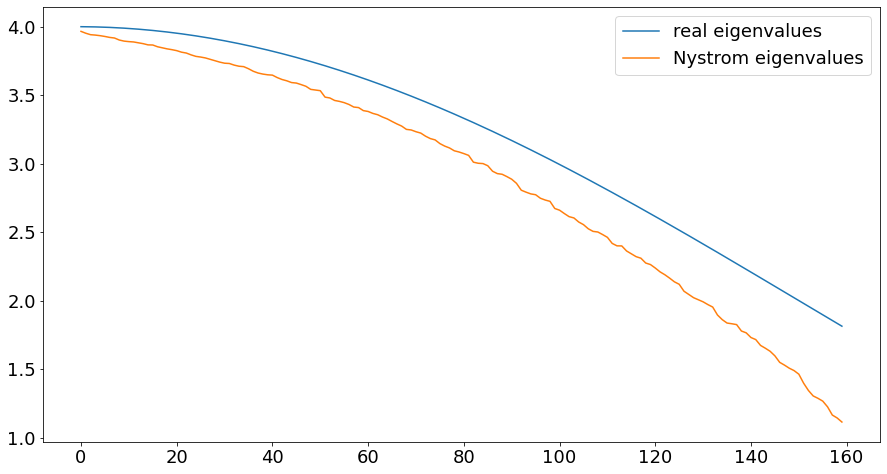

In [82]:
from scipy.linalg import svdvals
Ei = svdvals(A)[0:Ny.shape[0]]
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size': 18})
plt.plot(Ei)
plt.plot(Ny)
plt.gca().legend(('real eigenvalues','Nystrom eigenvalues'))
plt.show()

In [103]:
A = imread(os.path.join("/Users/nikosmatsavelas/Desktop/Thesis NTUA/gray.jpg"))
print(A.shape)
U, S, VT = np.linalg.svd(A,full_matrices=False) # Deterministic SVD

(1204, 1880)


In [83]:
k = 100 # Target rank
q = 2   # Power iterations
p = 5   # Oversampling parameter
def rSVD(A,k,q,p):
    # Step 1: Sample column space of X with P matrix
    m = A.shape[0]
    n = A.shape[1]
    l = k+p
    P = np.random.normal(0,1,size=(n,l))
    Z = A @ P
    for i in range(q):
        Z = A @ (A.T @ Z)

    Q, R = np.linalg.qr(Z)

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ A
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [84]:
U, S, VT = np.linalg.svd(A,full_matrices=False) # Deterministic SVD

r = 100 # Target rank
q = 3   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(A,r,q,p)

In [85]:
%%time
U, S, VT = np.linalg.svd(A,full_matrices=False)
print(U.shape)
print(S.shape)
print(VT.shape)

(1204, 1204)
(1204,)
(1204, 1880)
CPU times: user 2.61 s, sys: 103 ms, total: 2.72 s
Wall time: 1.4 s


In [86]:
%%time
rU, rS, rVT = rSVD(A,r,q,p)

CPU times: user 290 ms, sys: 18.4 ms, total: 308 ms
Wall time: 160 ms


In [87]:
# Reconstruction

In [88]:
%%time
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] # SVD approximation
errSVD1 = np.linalg.norm(A-XSVD,ord=2) / np.linalg.norm(A,ord=2)
print(errSVD1)

0.004863908600952318
CPU times: user 3.45 s, sys: 241 ms, total: 3.69 s
Wall time: 2.11 s


In [89]:
%%time
XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
errSVD2 = np.linalg.norm(A-XrSVD,ord=2) / np.linalg.norm(A,ord=2)
print(errSVD2)

0.005506319559670344
CPU times: user 4.1 s, sys: 336 ms, total: 4.43 s
Wall time: 3.53 s


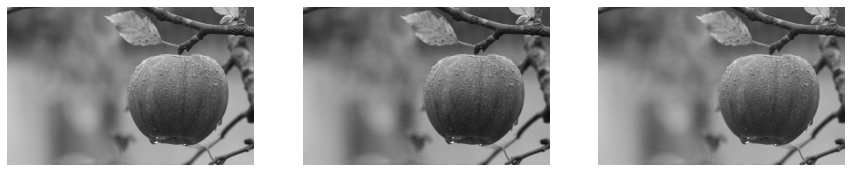

In [90]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(A)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

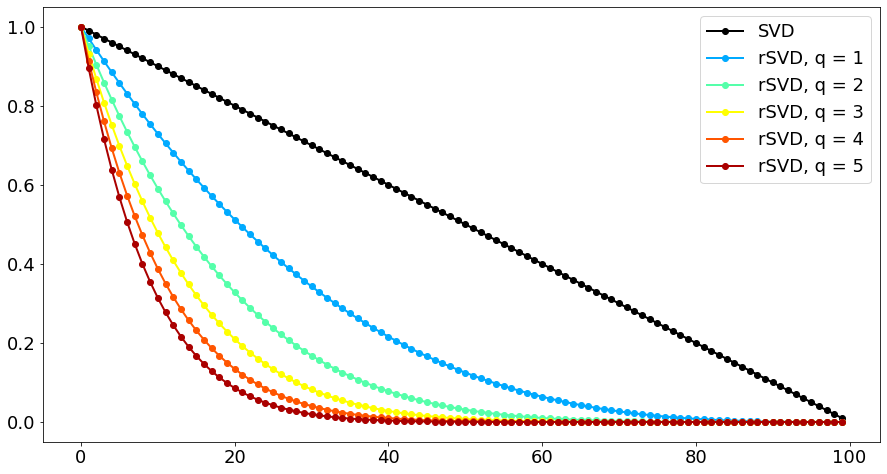

In [91]:
## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',LineWidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),LineWidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()

# Interpolative Decomposition (Optimal)

In [104]:
from scipy import linalg
def optim_id(A, k):
    _, R, P = linalg.qr(A,pivoting=True,
                              mode='economic',
                              check_finite=False)
    R_k = R[:k,:k]
    cols = P[:k]
    C = A[:,cols]
    Z = linalg.solve(R_k.T @ R_k,C.T @ A,
                           overwrite_a=True,
                           overwrite_b=True,
                           assume_a='pos')
    approx = C @ Z
    return(approx , cols , Z)

(3024, 4032, 3)


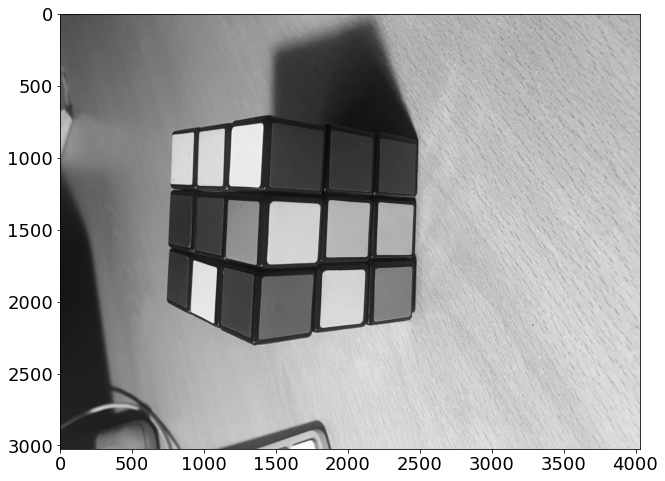

In [105]:
A = imread(os.path.join("/Users/nikosmatsavelas/Desktop/Thesis NTUA/Figures/IMG_0004.jpg"))
A[:, :, 0].shape
img_array = A / 255
print(img_array.shape)
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap="gray")
img_gray.shape
A = img_gray

In [106]:
k = 50
h1 = optim_id(A, k)

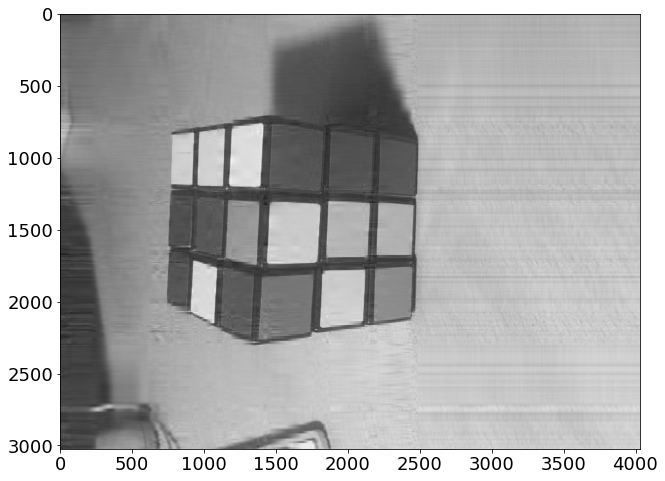

In [107]:
plt.imshow(h1[0], cmap="gray")

# Interpolative Decomposition (Randomized) - RID

In [108]:
rng = np.random.default_rng()
def optim_rid(A, k):
    oversampling = int(0.2 * k)
    p = k + oversampling
    idx = rng.choice(A.shape[1],
                     replace=False,
                     size=p)
    AS = A[:,idx]
    _, R, P = linalg.qr(AS, pivoting=True,
                              mode='economic',
                              check_finite=False) 
    R_k = R[:k,:k]
    _cols = P[:k]
    cols = idx[_cols]
    C = AS[:,_cols]
    Z = linalg.solve(R_k.T @ R_k,
    C.T @ A, overwrite_a=True,
                           overwrite_b=True,
                           assume_a='sym')
    approx = C @ Z
    return(approx , cols , Z)

In [109]:
k = 50
h2 = optim_rid(A, k)

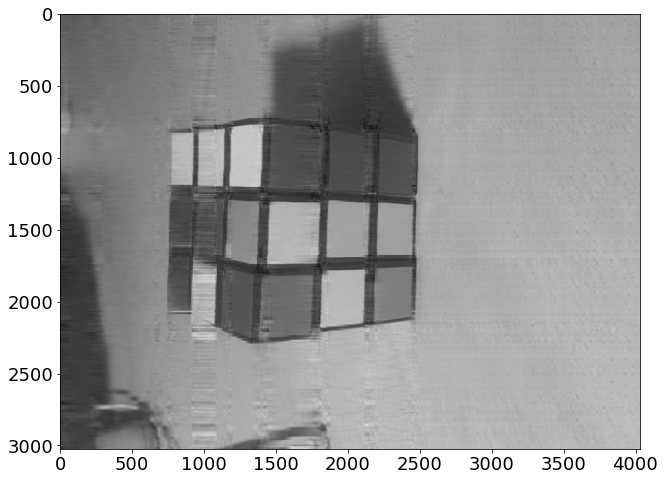

In [110]:
plt.imshow(h2[0], cmap="gray")

In [111]:
AH1 = optim_rid(A, k=500)
AH2 = optim_rid(A, k=100)
AH3 = optim_rid(A, k=50)

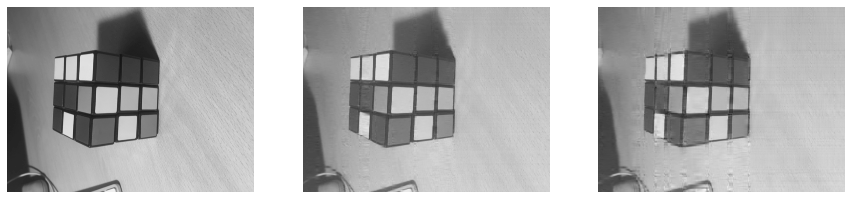

In [112]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(AH1[0])
axs[0].axis('off')
axs[1].imshow(AH2[0])
axs[1].axis('off')
axs[2].imshow(AH3[0])
axs[2].axis('off')


plt.show()

# Randomized PCA 

In [101]:
def rpca(A,k,p):
    l = k+p
    m = A.shape[0]
    n = A.shape[1]
    Omega = np.random.normal(0,1,size=(n,l))
    Y = A@Omega
    Q,_ = np.linalg.qr(Y)
    B = Q.T@A
    Uhat,Σ,W = np.linalg.svd(B, full_matrices = 0)
    U = Q@Uhat
    np.diag(Σ).shape
    Λ = Σ**2/(m-1)
    Z =U@Σ
    return(W,Λ,Z)